In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from SalesDataCleaner import SalesDataCleaner

In [3]:
url = 'https://raw.githubusercontent.com/FrancescoMariottini/project3/main/inputs/all_sales_data.csv'
sdc = SalesDataCleaner(url)
sdc.clean()

In [4]:
sdc_df = sdc.get_cleaned_data()

In [5]:
sdc_df.head(10)

,source,postcode,house_is,property_subtype,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,terrace,terrace_area,garden,garden_area,land_surface,facades_number,swimming_pool_has,region,building_state_agg
0,6,4180,True,MIXED_USE_BUILDING,295000.0,3.0,242.0,True,False,False,True,36.0,True,1000.0,1403.0,NaN,False,W,good
1,6,8730,True,VILLA,675000.0,4.0,349.0,True,False,False,False,0.0,True,977.0,1526.0,NaN,False,F,good
2,6,4020,True,APARTMENT_BLOCK,250000.0,5.0,303.0,True,False,False,False,0.0,False,0.0,760.0,NaN,False,W,to_renovate
3,6,1200,True,HOUSE,545000.0,4.0,235.0,True,True,False,False,0.0,False,0.0,63.0,NaN,False,B,renovated
4,6,1190,True,MIXED_USE_BUILDING,500000.0,2.0,220.0,True,False,False,False,0.0,True,60.0,193.0,NaN,False,B,good
5,6,4040,True,HOUSE,189000.0,3.0,200.0,True,False,False,False,0.0,True,40.0,100.0,NaN,False,W,to_renovate
6,6,4540,True,MIXED_USE_BUILDING,465000.0,4.0,400.0,True,False,False,False,0.0,False,0.0,312.0,NaN,False,W,good
7,6,1150,True,APARTMENT_BLOCK,650000.0,4.0,200.0,True,False,False,True,4.0,True,150.0,301.0,NaN,False,B,good
8,6,6870,True,MIXED_USE_BUILDING,89000.0,3.0,180.0,True,False,False,False,0.0,False,0.0,96.0,NaN,False,W,to_renovate
9,6,4030,True,MIXED_USE_BUILDING,129000.0,3.0,156.0,True,False,False,False,0.0,False,0.0,71.0,NaN,False,W,to_renovate


In [6]:
sdc_df['price_by_area'] = sdc_df['price'] / sdc_df['area']
sdc_df[['price_by_area']].head(10)

,price_by_area
0,1219.008264
1,1934.097421
2,825.082508
3,2319.148936
4,2272.727273
5,945.000000
6,1162.500000
7,3250.000000
8,494.444444
9,826.923077


In [7]:
def area_to_bin(area):
    if area >= 250:
        category = '250+'
    elif area >= 180:
        category = '180-250'
    elif area >= 120:
        category = '120-180'
    elif area >= 90:
        category = '90-120'
    elif area >= 60:
        category = '60-90'
    else:
        category = '0-60'
    return category

sdc_df['area_bin'] = sdc_df.area.map(area_to_bin)
sdc_df['area_bin'] = pd.Categorical(sdc_df['area_bin'], ['0-60', '60-90', '90-120', '120-180', '180-250', '250+'], ordered=True)
sdc_df['region'] = pd.Categorical(sdc_df['region'], ['B', 'F', 'W'], ordered=False)

In [8]:
sdc_df[['area_bin']].head(10)

,area_bin
0,180-250
1,250+
2,250+
3,180-250
4,180-250
5,180-250
6,250+
7,180-250
8,180-250
9,120-180


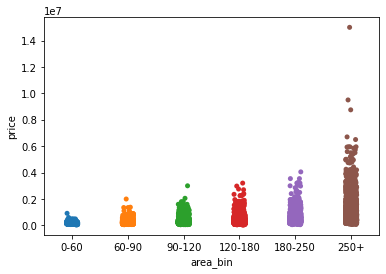

In [9]:
sns.stripplot(x='area_bin', y='price', data=sdc_df)

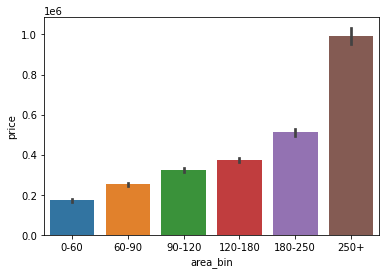

In [10]:
sns.barplot(x='area_bin', y='price', data=sdc_df, estimator=np.mean)

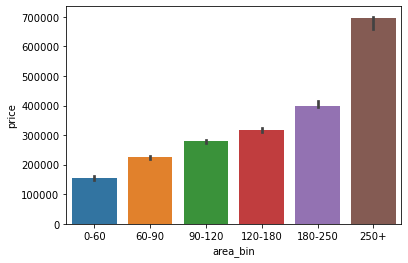

In [11]:
sns.barplot(x='area_bin', y='price', data=sdc_df, estimator=np.median)

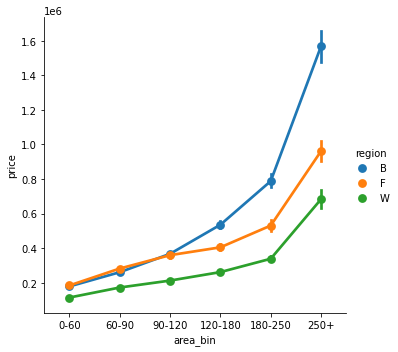

In [12]:
sns.factorplot(x='area_bin', y='price', data=sdc_df, hue='region', kin='bar')

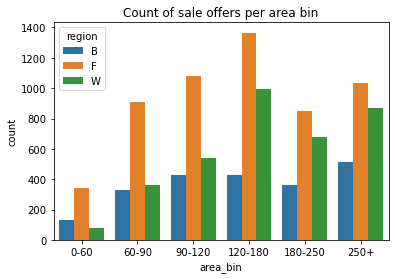

In [13]:
plot_count = sns.countplot('area_bin', data=sdc_df, hue = 'region')
plt.title('Count of sale offers per area bin')
plot_count.figure.savefig("count_per_area_bin.png")

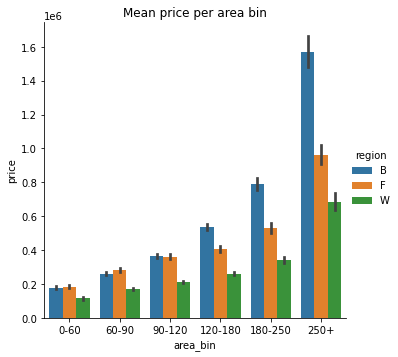

In [14]:
plot_mean = sns.factorplot(x='area_bin', y='price', data=sdc_df, hue='region', kind='bar', estimator=np.mean)
plt.title('Mean price per area bin')
plot_mean.savefig("mean_price_per_area_bin.png")

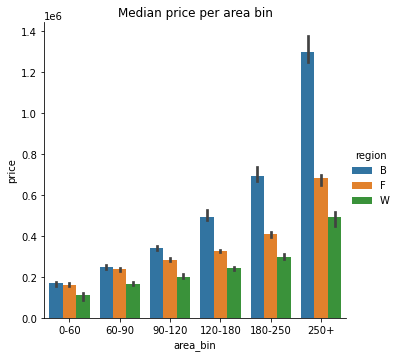

In [15]:
plot_median = sns.factorplot(x='area_bin', y='price', data=sdc_df, hue='region', kind='bar', estimator=np.median)
plt.title('Median price per area bin')
plot_median.savefig("median_price_per_area_bin.png")

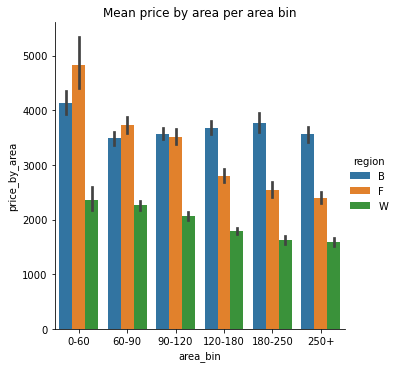

In [16]:
plot_mean_by_area = sns.factorplot(x='area_bin', y='price_by_area', data=sdc_df, hue='region', kind='bar', estimator=np.mean)
plt.title('Mean price by area per area bin')
plot_mean_by_area.savefig("mean_price_by_area_per_area_bin.png")

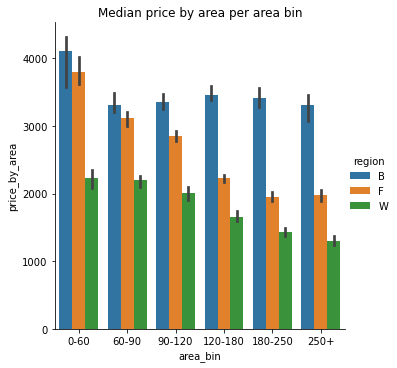

In [17]:
plot_median_by_area = sns.factorplot(x='area_bin', y='price_by_area', data=sdc_df, hue='region', kind='bar', estimator=np.median)
plt.title('Median price by area per area bin')
plot_median_by_area.savefig("median_price_by_area_per_area_bin.png")

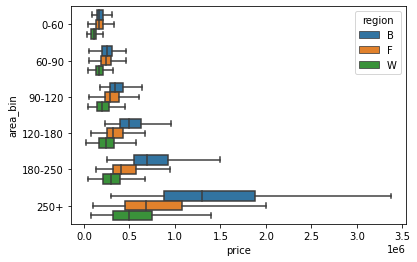

In [23]:
boxplot_no_outliers = sns.boxplot(x='price', y='area_bin', data=sdc_df, hue='region', showfliers = False)